<a href="https://colab.research.google.com/github/kalyanyatam/ML-projects/blob/main/diabetes_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Dependecies


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
%matplotlib inline



Dataset Collection



In [ ]:
df = pd.read_csv("hf://datasets/marianeft/diabetes_prediction_dataset/diabetes_prediction_dataset.csv")

Head of the Dataset


In [ ]:
df.head()

Checking Null values


In [ ]:
df.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
smoking_history,0
bmi,0
HbA1c_level,0
blood_glucose_level,0
diabetes,0


Shape of the Dataset

In [ ]:
print(df.shape)

(100000, 9)


In [ ]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [ ]:
#printing the number of diabetic and non diabetic
print(df['diabetes'].value_counts())

diabetes
0    91500
1     8500
Name: count, dtype: int64


0 -> Represents Non-Diabetic

1 -> Represents Diabetic

<Axes: xlabel='diabetes', ylabel='Count'>

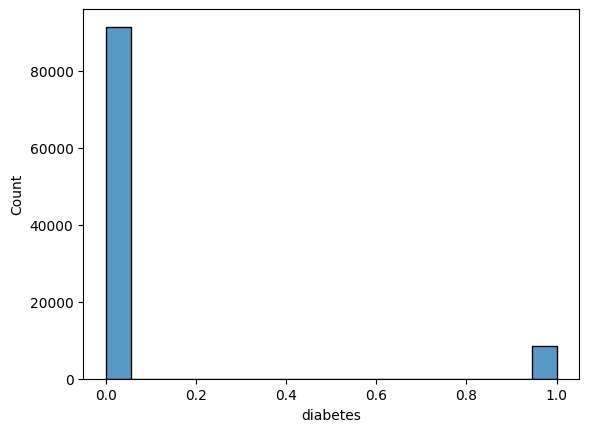

In [ ]:
sns.histplot(df['diabetes'], label = 'Count')

Calculating the mean value for the class lables(0,1)

In [ ]:
df.groupby('diabetes').mean()

TypeError: agg function failed [how->mean,dtype->object]

To Solve this Error We are using the Label Encoder to convert the strings into int64

In this Dataset ("gender,smoking_history") having the string datatype so we are converting them into int64

In [ ]:
# Encode categorical variables
label_encoders = {}
categorical_columns = ["gender", "smoking_history"]
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# ("gender,smoking_history") both features are changed into int64

In [ ]:
print(df.dtypes)


gender                   int64
age                    float64
hypertension             int64
heart_disease            int64
smoking_history          int64
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object


In [ ]:
#unique values for two features
print(df["gender"].unique())
print(df["smoking_history"].unique())


[0 1 2]
[4 0 1 3 2 5]


In [ ]:
print(df.head())


   gender   age  hypertension  heart_disease  smoking_history    bmi  \
0       0  80.0             0              1                4  25.19   
1       0  54.0             0              0                0  27.32   
2       1  28.0             0              0                4  27.32   
3       0  36.0             0              0                1  23.45   
4       1  76.0             1              1                1  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  


# HeatMap Representation

<Axes: >

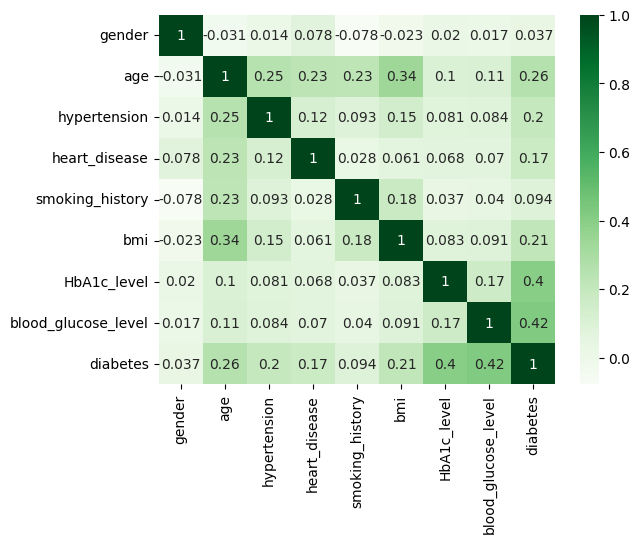

In [ ]:
sns.heatmap(df.corr(),cmap = 'Greens',annot=True)

In [ ]:
# Splitting features and target
X = df.drop(columns=["diabetes"])
y = df["diabetes"]


In [ ]:
print(X)

       gender   age  hypertension  heart_disease  smoking_history    bmi  \
0           0  80.0             0              1                4  25.19   
1           0  54.0             0              0                0  27.32   
2           1  28.0             0              0                4  27.32   
3           0  36.0             0              0                1  23.45   
4           1  76.0             1              1                1  20.14   
...       ...   ...           ...            ...              ...    ...   
99995       0  80.0             0              0                0  27.32   
99996       0   2.0             0              0                0  17.37   
99997       1  66.0             0              0                3  27.83   
99998       0  24.0             0              0                4  35.42   
99999       0  57.0             0              0                1  22.43   

       HbA1c_level  blood_glucose_level  
0              6.6                  140  
1  

In [ ]:
print(y)

0        0
1        0
2        0
3        0
4        0
        ..
99995    0
99996    0
99997    0
99998    0
99999    0
Name: diabetes, Length: 100000, dtype: int64


# Splitting the data

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardization

In [ ]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Defining Models

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "AdaBoost": AdaBoostClassifier(),
    "Bagging": BaggingClassifier()
}


## Training ans evaluation of Models

In [ ]:
# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f"{name}: Accuracy = {accuracy:.4f}")
    print(classification_report(y_test, y_pred))

Logistic Regression: Accuracy = 0.9587
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     18292
           1       0.86      0.61      0.72      1708

    accuracy                           0.96     20000
   macro avg       0.91      0.80      0.85     20000
weighted avg       0.96      0.96      0.96     20000

Decision Tree: Accuracy = 0.9517
              precision    recall  f1-score   support

           0       0.98      0.97      0.97     18292
           1       0.71      0.74      0.72      1708

    accuracy                           0.95     20000
   macro avg       0.84      0.86      0.85     20000
weighted avg       0.95      0.95      0.95     20000

Random Forest: Accuracy = 0.9701
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18292
           1       0.95      0.69      0.80      1708

    accuracy                           0.97     20000
   macro avg       0.96

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:42:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost: Accuracy = 0.9709
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18292
           1       0.95      0.69      0.80      1708

    accuracy                           0.97     20000
   macro avg       0.96      0.85      0.89     20000
weighted avg       0.97      0.97      0.97     20000

AdaBoost: Accuracy = 0.9721
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     18292
           1       1.00      0.67      0.81      1708

    accuracy                           0.97     20000
   macro avg       0.99      0.84      0.90     20000
weighted avg       0.97      0.97      0.97     20000

Bagging: Accuracy = 0.9689
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     18292
           1       0.91      0.71      0.79      1708

    accuracy                           0.97     20000
   macro avg       0.94      0.85      0.89   

In [ ]:
# Display best model
best_model = max(results, key=results.get)
print(f"\nBest Model: {best_model} with Accuracy: {results[best_model]:.4f}")



Best Model: Gradient Boosting with Accuracy: 0.9725


<Figure size 1500x1000 with 0 Axes>

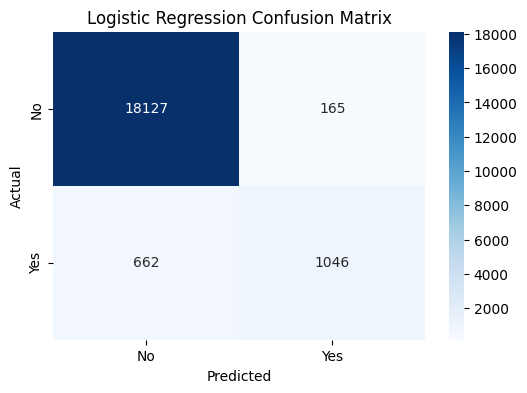

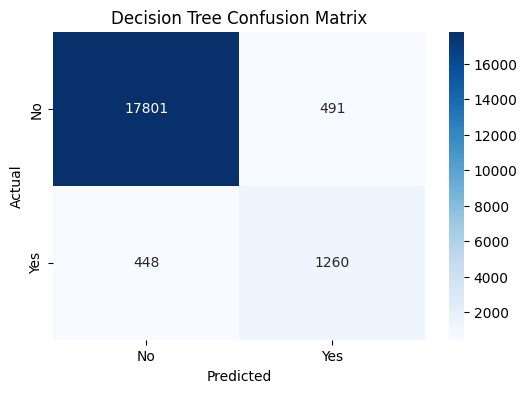

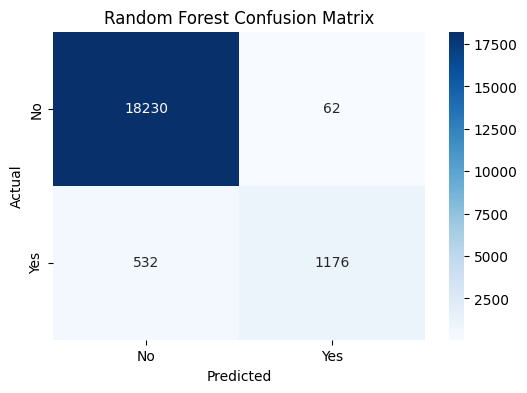

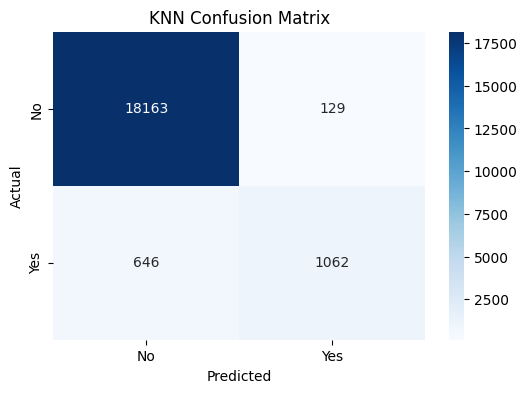

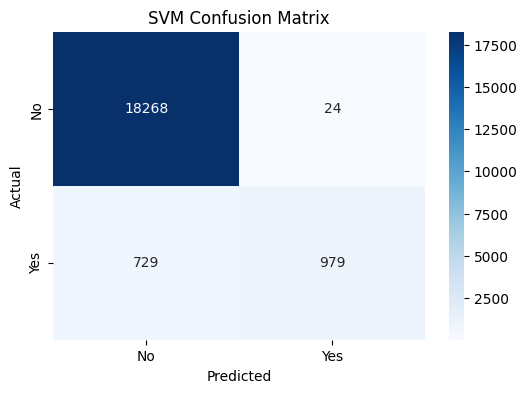

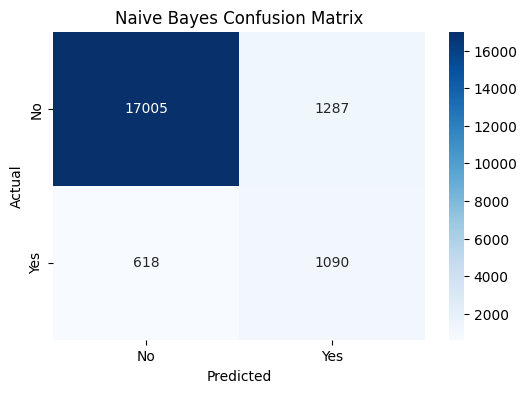

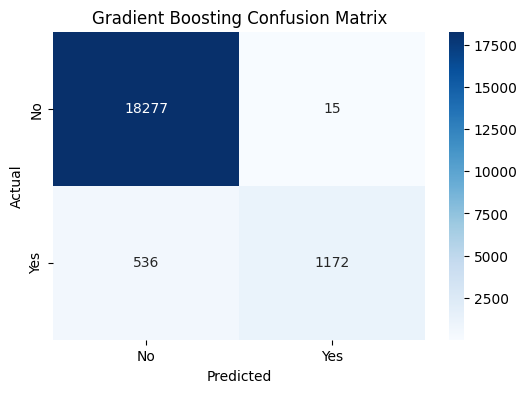

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:03:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


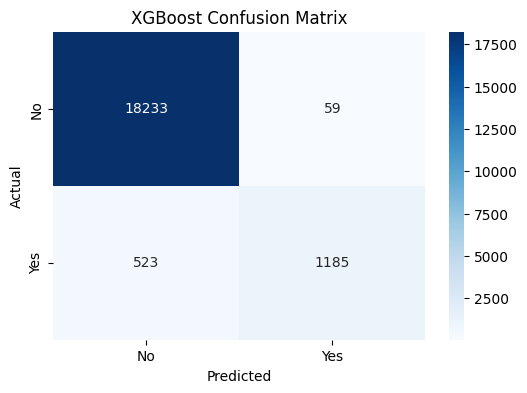

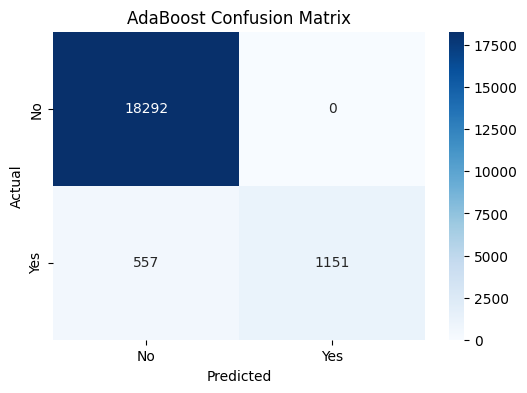

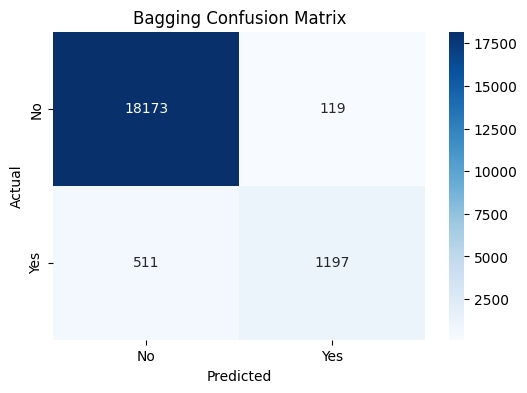

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Train models, predict, and plot confusion matrices vertically
for name, model in models.items():
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Make predictions

    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix
    plt.figure(figsize=(6, 4))  # Set figure size
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()  # Show one by one


Making a predictive System

In [ ]:
def make_prediction():
    print("\n🔮 Enter feature values for prediction:")

    input_data = []
    for feature in X.columns:
        value = input(f"Enter {feature}: ")
        input_data.append(value)

    # Encode categorical variables correctly
    for i, col in enumerate(categorical_columns):
        if col in label_encoders:
            try:
                input_data[i] = label_encoders[col].transform([input_data[i]])[0]
            except ValueError:
                print(f"⚠️ Warning: Unknown category '{input_data[i]}' for '{col}'. Using default value.")
                input_data[i] = 0  # Assign default category
        else:
            input_data[i] = float(input_data[i])  # Ensure numeric columns stay numeric

    # Convert to numeric array
    input_data = np.array(input_data).reshape(1, -1)

    # Apply scaling
    input_data = scaler.transform(input_data)

    # ✅ Fix: Ensure best_model is an actual trained model
    best_model_name = "Random Forest"  # Change this based on your best model
    best_model = models[best_model_name]  # Get the trained model instance

    # Make prediction
    prediction = best_model.predict(input_data)

    # Output result
    result = "Positive (Yes)" if prediction[0] == 1 else "Negative (No)"
    print(f"\n🔍 Predicted Result: {result}")

# Run the predictive system
make_prediction()




🔮 Enter feature values for prediction:
